# Введение

В этом модуле мы рассмотрим, как с помощью Python можно упростить сбор информации из интернета и, в некоторых случаях, получить доступ к данным, которые невозможно «собрать руками». В частности, мы:

* рассмотрим, в каком виде информация обычно находится в интернете;
* напишем программы, которые собирают данные с веб-сайтов, используя библиотеки `requests` и `BeautifulSoup`;
* разберёмся, что такое программный интерфейс веб-сервисов (`API`) и как его использовать (для примера мы будем собирать данные в социальной сети ВКонтакте).  

К концу изучения модуля вы сможете писать программы, которые избавят вас от многих часов монотонной работы и расширят спектр собираемой информации.

# 2/10  2. Веб-запросы

Процесс получения/извлечения информации с веб-ресурсов в интернете называется `web-scraping` (рус. веб-скрейпинг/веб-скрапинг). Веб-скрапинг может быть проделан вручную пользователем компьютера, однако этот термин обычно связывают с автоматизированными процессами, реализованными с помощью кода.

Клиент и сервер взаимодействуют между собой, обмениваясь одиночными сообщениями (не потоком данных) посредством сетевых протоколов, которые формализуют общение между ними. В настоящее время повсеместно используемый протокол в интернете, позволяющий клиенту получать различные ресурсы (например, HTML-документы), — это протокол HTTP.

Запрос, отправляемый клиентом с использованием протокола HTTP, состоит из нескольких элементов:

* адрес, по которому идёт обращение (например, www.google.com);
* техническая информация, например метод запроса;
* дополнительные данные, например если загружается (передаётся) изображение.  

Адрес — это URL, Uniform Resource Locator (с англ. Унифицированный Указатель Ресурса).

Ответ, в свою очередь, состоит из следующих элементов:

* код статуса ответа: например, 200 («успешно»), 404 («не найден») и т. д. (более полный список кодов статуса ответа можете посмотреть, перейдя по ссылке);
* текст в запрошенном формате (HTML, XML, JSON и т. д.) или мультимедийные файлы;
* прочая техническая информация.

#### МЕТОДЫ ЗАПРОСОВ В ПРОТОКОЛЕ HTTP

Для того чтобы указать серверу на то, какое действие мы хотим произвести с ресурсом, в протоколе HTTP используются так называемые методы. В HTTP существует несколько методов, которые описывают действия с ресурсами. Чаще всего используются `GET` и `POST`.

`GET` — ПОЛУЧЕНИЕ РЕСУРСА

Метод GET запрашивает информацию из указанного источника и `не может влиять на его содержимое`. Запрос `доступен для кэширования данных` (то есть для сохранения, восстановления и дальнейшего использования) и добавления в закладки. `Длина запроса ограничена` (максимальная длина — 2048 символов).

Пример `GET`-запроса, отправляемого через адресную строку браузера:

 http://site.ru/page.php?name=dima&age=27

`POST` — СОЗДАНИЕ РЕСУРСА

Метод `POST` используется для отправки данных, которые могут оказывать влияние на содержимое ресурса. В отличие от метода GET, запросы POST `не могут быть кэшированы`, они `не остаются в истории` браузера и их `нельзя добавить в закладки`. `Длина запроса POST` `не ограничивается`.

Пример `POST`-запроса, отправляемого через форму запроса:

POST / HTTP/1.0\r\n  
Host: www.site.ru\r\n  
Referer: http://www.site.ru/index.html\r\n  
Cookie: income=1\r\n  
Content-Type: application/x-www-form-urlencoded\r\n  
Content-Length: 35\r\n  
\r\n  
login=Dima&password=12345  

# 3/10  3. Библиотека requests

✍ В стандартной библиотеке Python для отправки веб-запросов существует функция `urllib2`, но большинство разработчиков используют стороннюю библиотеку `requests` (c англ. запросы), потому что её работа `более стабильна`, а созданный с её помощью код получается `проще`. Поэтому мы `будем работать с` библиотекой `requests`, а urllib2 рассматривать не будем.

С помощью скрипта мы будем в удобном виде выгружать информацию по курсам валют с заранее выбранного сайта.

Один из сайтов в интернете, на котором информация о курсах валют дублирует информацию с сайта Центрального Банка России, — ресурс Курсы валют ЦБ РФ в `XML` и `JSON`. На данном ресурсе информация о курсах валют представлена в разных форматах, в том числе и в структурированном JSON-формате, методы работы с которым мы изучили в одном из предыдущих модулей.

Перед началом работы библиотеку requests потребуется установить. Например, в `Jupyter Notebook `это делается с помощью такой команды:

In [112]:
# Устанавливаем библиотеку requests
!pip install requests 

Defaulting to user installation because normal site-packages is not writeable


Как только библиотека установлена, импортируем её и отправим наш первый запрос к ресурсу Курсы валют ЦБ РФ в `XML` и `JSON`. Используем метод `get()` из библиотеки `requests`, передав ему соответствующий `URL` —  `https://www.cbr-xml-daily.ru/daily_json.js`:

In [113]:
import requests # Импортируем библиотеку requests
url = 'https://www.cbr-xml-daily.ru/daily_json.js' # Определяем значение URL страницы для запроса
response = requests.get(url) # Делаем GET-запрос к ресурсу и результат ответа сохраняем в переменной response

Проверим ответ сервера — содержимое переменной `response`:

In [114]:
print(response) # Выводим значение response на экран как объект

<Response [200]>


Мы получили объект ответа Response, который содержит всю нужную нам информацию. По умолчанию в квадратных скобках на экран выводится код статуса ответа. В данном случае он равен `200` — то есть запрос был корректным и сервер отдал нам нужную информацию. Значение кода статуса `404` означало бы, что страница по указанному адресу не найдена, а значение `403` — что синтаксис GET-запроса неверный.

Код ответа в виде числовой переменной можно получить с помощью метода `status_code`:

In [115]:
print(response.status_code) # Выводим числовое значение response на экран

200


#### РАБОТАЕМ С ОТВЕТОМ

Мы сделали запрос и получили корректный ответ (код статуса — 200). Дальнейшую работу производим с результатом запроса к ресурсу Курсы валют ЦБ РФ в `XML` и `JSON`.

?
Как получить доступ ко всей информации, которую содержит ответ?

Текст ответа хранится в атрибуте `text`. Выведем значение атрибута на экран и посмотрим на его содержимое:

In [116]:
print(len(response.text))
print(response.text) # Выводим содержимое атрибута text переменной response на экран

10860
{
    "Date": "2023-09-07T11:30:00+03:00",
    "PreviousDate": "2023-09-06T11:30:00+03:00",
    "PreviousURL": "\/\/www.cbr-xml-daily.ru\/archive\/2023\/09\/06\/daily_json.js",
    "Timestamp": "2023-09-06T17:00:00+03:00",
    "Valute": {
        "AUD": {
            "ID": "R01010",
            "NumCode": "036",
            "CharCode": "AUD",
            "Nominal": 1,
            "Name": "Австралийский доллар",
            "Value": 62.6494,
            "Previous": 62.4343
        },
        "AZN": {
            "ID": "R01020A",
            "NumCode": "944",
            "CharCode": "AZN",
            "Nominal": 1,
            "Name": "Азербайджанский манат",
            "Value": 57.5552,
            "Previous": 57.3755
        },
        "GBP": {
            "ID": "R01035",
            "NumCode": "826",
            "CharCode": "GBP",
            "Nominal": 1,
            "Name": "Фунт стерлингов Соединенного королевства",
            "Value": 122.8332,
            "Previous": 123.

Как правило, при работе над реальным проектом на этапе получения данных мы уже понимаем, с какими форматами данных нам придётся работать. На предлагаемом для работы ресурсе информация есть как в JSON-формате, так и в XML. По нашему запросу ресурс возвращает информацию в JSON-формате, однако в настоящий момент результат хранится как единая строка. Проверить тип данных полученного ответа можно, воспользовавшись функцией `type()`.

Для того чтобы удобно было работать с полученной информацией, нам необходимо преобразовать строку в словарь. В объект ответа Response  из библиотеки `requests` уже встроен метод `json()` .

Импортируем функцию `pprint()`, применим к полученному ответу метод `json()` и выведем полученный результат на экран:

In [117]:
from pprint import pprint # Импортируем функцию pprint()
currencies = response.json() # Применяем метод json()
pprint(len(currencies))
pprint(currencies) # Выводим результат на экран)

5
{'Date': '2023-09-07T11:30:00+03:00',
 'PreviousDate': '2023-09-06T11:30:00+03:00',
 'PreviousURL': '//www.cbr-xml-daily.ru/archive/2023/09/06/daily_json.js',
 'Timestamp': '2023-09-06T17:00:00+03:00',
 'Valute': {'AED': {'CharCode': 'AED',
                    'ID': 'R01230',
                    'Name': 'Дирхам ОАЭ',
                    'Nominal': 1,
                    'NumCode': '784',
                    'Previous': 26.5555,
                    'Value': 26.6387},
            'AMD': {'CharCode': 'AMD',
                    'ID': 'R01060',
                    'Name': 'Армянских драмов',
                    'Nominal': 100,
                    'NumCode': '051',
                    'Previous': 25.2814,
                    'Value': 25.3593},
            'AUD': {'CharCode': 'AUD',
                    'ID': 'R01010',
                    'Name': 'Австралийский доллар',
                    'Nominal': 1,
                    'NumCode': '036',
                    'Previous': 62.4343,
          

Теперь данные находятся в словаре и можно легко получать необходимые значения.

Например, по ключу `Valute` мы можем обратиться к вложенному словарю, который содержит информацию о мировых валютах. Выведем на экран, например, информацию о евро (`EUR`):



In [118]:
pprint(currencies['Valute']['EUR']) # Выводим на экран информацию о валюте евро

{'CharCode': 'EUR',
 'ID': 'R01239',
 'Name': 'Евро',
 'Nominal': 1,
 'NumCode': '978',
 'Previous': 104.9043,
 'Value': 105.0789}



Задание 3.2

Повторите запросы, описанные в этом юните, на своём компьютере. Что будет выведено на экран в результате выполнения следующего кода?

In [119]:
pprint(currencies['Valute']['CZK']['Name'])

'Чешских крон'


# 4/10  4. Парсинг сайтов

✍ Ресурс, с которым мы работали в предыдущем юните, возвращал ответ о текущем курсе валют в удобном, структурированном формате, из которого было легко извлечь необходимую информацию. Довольно часто для получения информации приходится обращаться напрямую к HTML-страницам.

Для примера рассмотрим страницу, содержащую статью с информацией о присуждении Нобелевской премии по экономике в 2021 году, и попробуем извлечь из неё заголовок статьи, опубликованной на странице, дату публикации, а также текст статьи.

Получить содержимое страницы в большинстве случаев несложно, гораздо труднее извлечь из HTML-кода нужную информацию.

#### ОСНОВЫ `HTML`

`HTML` (англ. HyperText Markup Language, рус. язык гипертекстовой разметки) — стандартизированный язык разметки документов в интернете. Большинство веб-страниц содержат описание разметки на языке HTML. Язык HTML интерпретируется браузерами. Полученный в результате интерпретации текст отображается на экране монитора компьютера или мобильного устройства.

HTML является близким родственником уже знакомого вам формата XML. Разметка на языке HTML делается с помощью так называемых `тегов`, которые помещаются в `угловые скобки`, и применяется к элементам, заключённым внутри них. Посмотрите на примеры:

<h2> Это заголовок второго уровня </h2>
<div> А это обычный текст </div>

У корректной HTML-страницы есть заголовок и тело страницы. В заголовке (в тегах `<head> … </head>`)  размещается техническая информация, подключаются скрипты и стили. В теле `<body> … </body>` находятся текст и данные, которые непосредственно отображаются на странице в браузере.

Разметка небольшой страницы выглядит примерно так:

<!DOCTYPE html>
<html lang="ru">
    <head>
        <title>Название страницы</title>
        <meta charset="UTF-8">
    </head>
    <body>
        <h1> Это заголовок страницы </h1>
        <p> Какой-то текст </p>
    </body>
</html>

Вы можете сохранить этот код в текстовом файле с расширением `.html` и открыть этот файл в браузере.

Обратите внимание, что теги образуют иерархическую структуру, то есть одни теги расположены внутри других. В примере выше тег `<p> … </p>` находится внутри тега `<body> … </body>`.

Кроме того, у тегов могут быть атрибуты, которые пишутся внутри открывающегося тега. Самые популярные атрибуты — это `class` и `id`:

<h1 id="big-title"> Заголовок страницы </h1>
<p class="red-back"> Какой-то текст </p>

Изучение языка HTML находится вне рамок этого курса, но для того, чтобы собирать информацию с веб-страниц, нет необходимости хорошо знать HTML. Достаточно понимать, что:

* существуют теги с разными именами;
* у тегов бывают атрибуты, такие как class и id;
* теги образуют иерархическую структуру, то есть одни теги вложены в другие.

#### ПОЛУЧАЕМ СОДЕРЖИМОЕ ВЕБ-СТРАНИЦЫ

Получим HTML-код интересующей нас страницы.

Для этого отправим `GET-запрос` с помощью библиотеки `requests` и метода `get()` и посмотрим на текст ответа на наш запрос (как мы помним, он содержится в атрибуте `text`):

In [120]:
import requests # Импортируем библиотеку requests
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url)  # Выполняем GET-запрос
print(response.text)  # Выводим содержимое атрибута text

<!DOCTYPE html>
<html prefix="og: http://ogp.me/ns#" lang="ru">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/AeonikPro/AeonikPro-Regular.woff2" as="font" type="font/woff2" crossorigin />
    <link rel="preload" href="https://staticn1.nplus1.ru/fonts/Spectral/Spectral-Regular.woff" as="font" type="font/woff2" crossorigin />
  <link href="/front-build/css/main.css?id=c066269c9e31b8c5719ba747306ba601" rel="stylesheet">
  <link href="/front-build/css/app.css?id=09c66ab9053b6ee68d87437dc6b9d719" rel="stylesheet">
  

  <link rel="apple-touch-icon" sizes="180x180" href="/apple-touch-icon.png">
  <link rel="icon" type="image/png" sizes="32x32" href="/favicon-32x32.png">
  <link rel="icon" type="image/png" sizes="16x16" href="/favicon-16x16.png">
  <link rel="

Ответ содержит HTML-код страницы, к которой мы обратились.

В отличие от предыдущего примера, где ответ возвращался в JSON-формате, мы не можем так просто преобразовать HTML-код в словарь и извлечь необходимую нам информацию.

Для решения таких задач в Python существует специальная библиотека `BeautifulSoup`, о работе с которой мы поговорим в следующем юните.

# 5/10  5. Библиотека `BeautifulSoup`

✍ Для поиска необходимых нам данных мы будем использовать библиотеку `BeautifulSoup`, которая позволяет по названию тегов и их атрибутов получать содержащийся в них текст.

`BeautifulSoup` не является частью стандартной библиотеки, поэтому для начала её нужно установить. Например, в `Jupyter Notebook` это делается с помощью такой команды:

In [121]:
# Устанавливаем библиотеку BeautifulSoup
!pip install beautifulsoup4 

Defaulting to user installation because normal site-packages is not writeable


После установки импортируем библиотеку в наш код:

In [122]:
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup

Теперь мы можем извлекать данные из любой веб-страницы.

Ранее мы уже получили содержимое страницы с помощью `GET-запроса` и сохранили информацию в переменной `response` , теперь создадим объект `BeautifulSoup` с именем page, указывая в качестве параметра `html.parser`.

Для примера получим информацию o `title` (с англ. заголовок) — это строка, которая отображается на вкладке браузера:

In [123]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page.title) # Получаем тег title, отображающийся на вкладке браузера
print(page.title.text) # Выводим текст из полученного тега, который содержится в атрибуте text

<title>Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей</title>
Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей


`Если при запросе к сайту, а затем при его разборе с помощью BeautifulSoup в тексте страницы не находится нужный тег, попробуйте вывести на печать пару тысяч символов текста страницы. Если там обнаружится нечто похожее на капчу, возможно, сайт посчитал вас роботом и отказывается выдавать содержимое. Чтобы получить его, попробуйте «притвориться» браузером при запросе из скрипта:`

requests.get(url, headers={'User-Agent': 'Mozilla/5.0'})

User-Agent своего браузера можно узнать по этой ссылке: https://n5m.ru/usagent.html

#### ИЗВЛЕКАЕМ ЗАГОЛОВОК И ВРЕМЯ НАПИСАНИЯ СТАТЬИ

Выполним поставленную ранее задачу: получить информацию о странице и извлечь заголовок статьи, опубликованной на этой странице, дату публикации, а также текст статьи.

Предположим, что мы знаем, что в HTML-коде рассматриваемой нами страницы заголовок статьи заключён в тег `<h1> … </h1>` (заголовок первого уровня).

Тогда мы можем получить его текст с помощью метода `find()` (с англ. найти) объекта `BeautifulSoup`, передав ему название интересующего нас тега:

In [124]:
print(page.find('h1').text) # Применяем метод find() к объекту и выводим результат на экран


            Премию Нобеля по экономике присудили за исследования экономики труда и причинно-следственных связей
          


?
Но как же узнать, в каких именно тегах заключена необходимая информация?

Проще всего это сделать с помощью так называемого инструмента разработчика, который есть во всех современных браузерах. Покажем, как открыть данный инструмент на примере использования браузера Google Chrome.

Устанавливаем курсор на элементе страницы (заголовок статьи), информацию о котором хотим получить, нажимаем на правую клавишу мыши и в выпадающем списке выбираем пункт «Просмотреть код элемента» или «Посмотреть код» в зависимости от браузера.

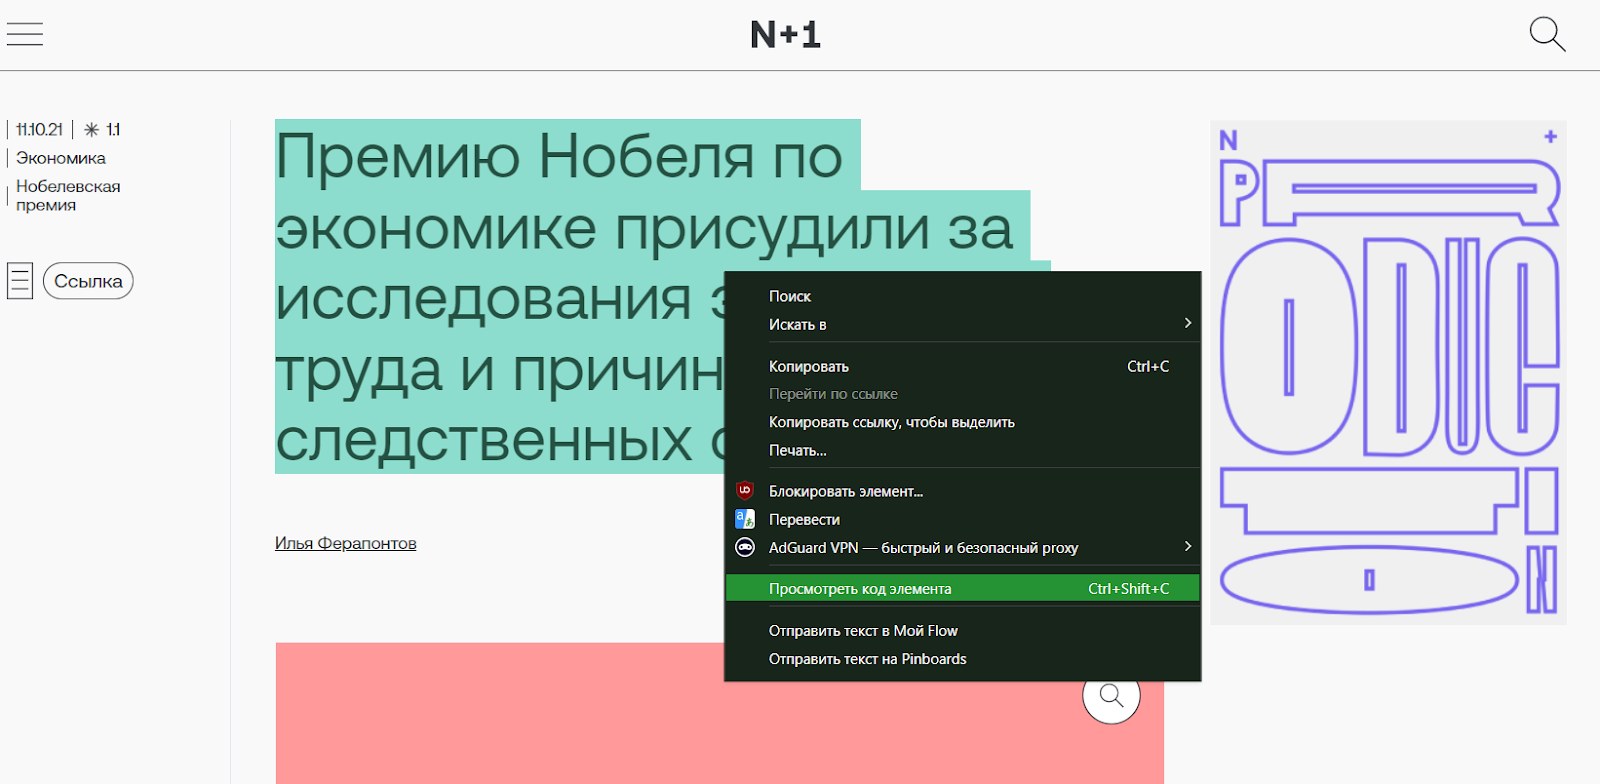

В открывшемся окне инструмента разработчика видим, что информация о заголовке статьи заключена в теге `<h1> … </h1>`.

Аналогично получим информации о теге, который содержит дату написания статьи, отображаемую в левом верхнем углу страницы.

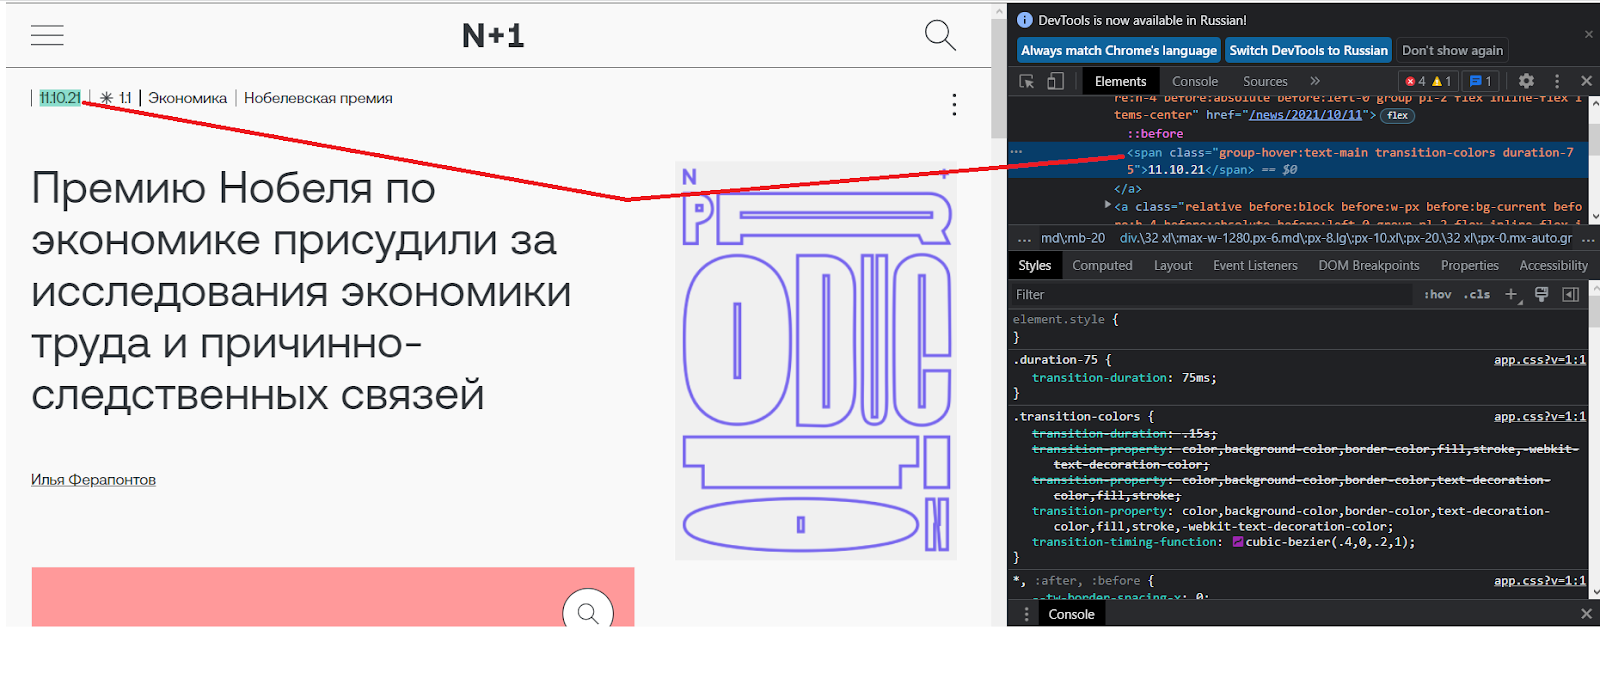

Итак, нам нужен тег `<span> … </span>`.

Теперь получим данные из него с помощью уже известного метода `find()`, передав название нужного тега:

In [125]:
print(page.find('span').text)


13:04



In [126]:
print([text.text for text in page.find_all('span', class_="group-hover:text-main transition-colors duration-75")][:2]) # Выводим на экран содержимое атрибута text тега span

['13:04', '11.10.21']


Задание 5.3

Используя инструмент разработчика в браузере, определите, в каком теге лежит большой заголовок на странице в Wikipedia.  
В качестве ответа запишите наименование тега (например, `head`).
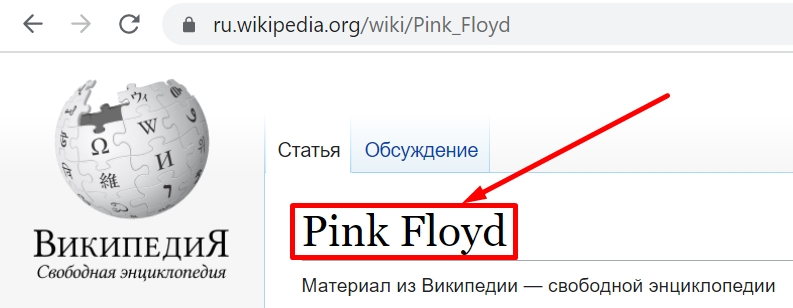

In [127]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/Pink_Floyd' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page1 = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
print(page1.find('span', class_='mw-page-title-main').text) # Получаем тег title, отображающийся на вкладке браузера


Pink Floyd


Задание 5.4 (External resource)

Напишите функцию `wiki_header`, которая по адресу страницы возвращает заголовок первого уровня для статей на `Wikipedia`.

Функция `wiki_header` принимает один аргумент - `url`.

wiki_header('https://en.wikipedia.org/wiki/Operating_system')
'Operating system'

In [128]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup

def wiki_header(url):
    response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
    page0 = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
    return page0.find('h1').text

wiki_header('https://en.wikipedia.org/wiki/Operating_system')
# 'Operating system'

'Operating system'

#### НЕУНИКАЛЬНЫЕ ТЕГИ: ИЗВЛЕКАЕМ ТЕКСТ СТАТЬИ

Теперь получим сам текст статьи. Как вы уже знаете, первым делом необходимо определить, в какой тег он заключён. Применим, как и ранее, инструмент разработчика.

Видим, что искомый текст заключён в тег  `<div> … </div>` . Попробуем извлечь его уже известным нам способом — с помощью метода `find()` — и выведем его на экран.

In [137]:
import requests # Импортируем библиотеку requests
from bs4 import BeautifulSoup # Импортируем библиотеку BeautifulSoup
url = 'https://nplus1.ru/news/2021/10/11/econobel2021' # Определяем адрес страницы
response = requests.get(url) # Выполняем GET-запрос, содержимое ответа присваивается переменной response
page = BeautifulSoup(response.text, 'html.parser')

print(page.find('div').text) # Выводим содержимое атрибута text тега div

Мы увидели не то, что ожидали — кучу текста, не имеющего отношения к тому, что мы искали...

?
В чём же проблема?



Дело в том, что теги `<div> … </div>` очень распространённые и на странице их очень много. Метод `find()` нашёл первый из них, но это не то, что нам надо.

Посмотрим на нашу страницу, используя инструмент разработчика, ещё раз. Можем заметить, что у искомого текста есть свой класс — `n1_material text-18` :

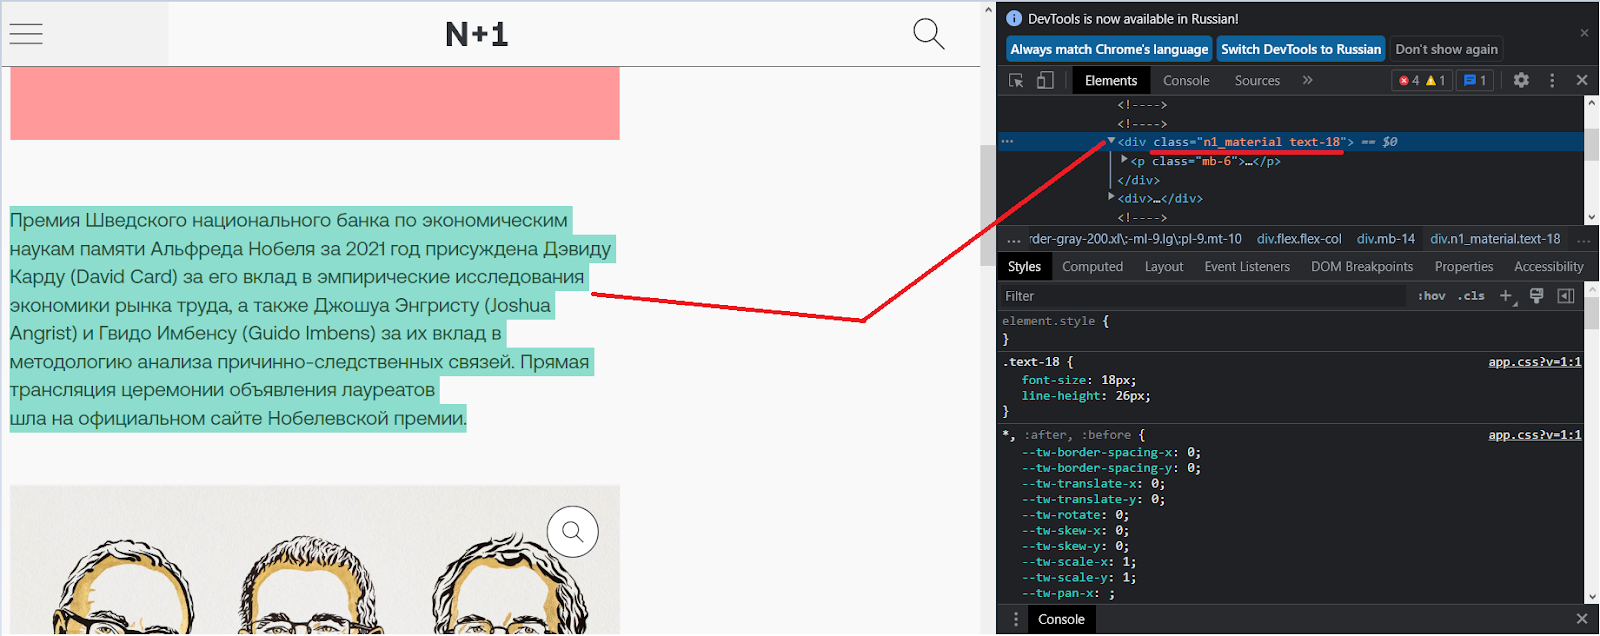

Передадим название класса в метод `find()` с помощью аргумента `class_` и получим текст статьи:

In [136]:
print(page.find('div', class_='n1_material text-18').text) # Выводим содержимое атрибута text тега div класса n1_material text-18

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


В данном случае происходит поиск точного строкового значения `class` атрибута, т. е. выполнение строк кода:

In [138]:
print(page.find('div', class_='n1_material').text)

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


In [139]:
print(page.find('div', class_='n1_material text-18').text)

Премия Шведского национального банка по экономическим наукам памяти Альфреда Нобеля за 2021 год присуждена Дэвиду Карду (David Card) за его вклад в эмпирические исследования экономики рынка труда, а также Джошуа Энгристу (Joshua Angrist) и Гвидо Имбенсу (Guido Imbens) за их вклад в методологию анализа причинно-следственных связей. Прямая трансляция церемонии объявления лауреатов шла на официальном сайте Нобелевской премии.


даст одинаковый результат.

При выполнении строки кода:

In [140]:
print(page.find('div', class_='text-18 n1_material').text)


AttributeError: 'NoneType' object has no attribute 'text'

мы получим ошибку, так как такого строкового значения в области поиска нет.

О поиске по классу можно узнать подробнее в Beautiful Soup Documentation(https://www.crummy.com/software/BeautifulSoup/bs4/doc/#searching-by-css-class).


Задача решена — мы извлекли из контента страницы заголовок статьи, опубликованной на странице, дату публикации, а также текст статьи.

#### СБОР НЕСКОЛЬКИХ ЭЛЕМЕНТОВ: СОБИРАЕМ ВСЕ ССЫЛКИ НА СТРАНИЦЕ

Рассмотрим ещё один сценарий: вы хотите собрать сразу несколько элементов со страницы. Например, представьте, что вы хотите получить названия всех языков программирования, упомянутых на странице в Wikipedia в статье про языки программирования.

Можно заметить, что все названия языков программирования на этой странице связаны ссылками c соответствующими статьями о них. Таким образом, нам необходимо собрать все ссылки на странице. Для ссылок в HTML предусмотрен тег `<a> … </a>`. Попробуем использовать find():

In [141]:
url = 'https://en.wikipedia.org/wiki/List_of_programming_languages' # Задаём адрес ресурса
response = requests.get(url) # Делаем GET-запрос к ресурсу
page = BeautifulSoup(response.text, 'html.parser') # Создаём объект BeautifulSoup
print(page.find('a')) # Ищем ссылку по тегу <a> и выводим её на экран

<a class="mw-jump-link" href="#bodyContent">Jump to content</a>


Мы получили только одну ссылку, хотя на странице их явно больше.

Это происходит, потому что метод `find()` возвращает только первый подходящий элемент. Если требуется получить больше элементов, необходимо воспользоваться методом `find_all()` (с англ. найти все):

In [142]:
links = page.find_all('a') # Ищем все ссылки на странице и сохраняем в переменной links в виде списка
print(len(links)) # Выводим количество найденных ссылок

955


Итак, на момент создания этих учебных материалов на странице содержалось 928 ссылок. Посмотрим на некоторые из них:

In [143]:
print([link.text for link in links[500:510]]) # Выводим ссылки с 500 по 509 включительно

['MAD', 'MAD/I', 'Magik', 'Magma', 'Máni', 'Maple', 'MAPPER', 'MARK-IV', 'Mary', 'MATLAB']


Не все ссылки соответствуют названиям языков программирования — страница содержит также «служебные» ссылки, такие, например, как `Jump to navigation` (с англ. Перейти к навигации) или `Alphabetical` (с англ. По алфавиту):

In [144]:
print([link.text for link in links[0:10]]) # Выводим ссылки с 1 по 9 включительно

['Jump to content', 'Main page', 'Contents', 'Current events', 'Random article', 'About Wikipedia', 'Contact us', 'Donate', 'Help', 'Learn to edit']


Для обработки полученных данных и исключения «лишней» информации можно, например, использовать подходы, которые вы изучили в модуле 6.

✍ В заключение заметим, что BeautifulSoup — достаточно мощная библиотека. Мы рассмотрели её базовые возможности, но их полный список гораздо шире. С ним можно ознакомиться в официальной документации (https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

# 6/10  6. Работа с API

✍ В предыдущих разделах мы собирали полезную информацию с различных сайтов.

Вы могли убедиться, что поиск необходимой информации с выделением правильных тегов — довольно трудоёмкая задача. Кроме того, подобные программы могут ломаться в случаях, когда меняется дизайн сайта, его разметка или владельцы сайтов защищаются от ботов `капчей`.

К счастью, многие крупные сайты предоставляют доступ к так называемым `API` (англ. Application Programming Interface, рус. Интерфейс Прикладного Программирования).

`API` — это специальные разделы сайта, где информацию можно получать без разметки, а формат запросов и ответов зафиксирован. API созданы для того, чтобы облегчить взаимодействие с сайтом для сторонних разработчиков.

К примеру, мы уже видели, как ресурс Курсы валют ЦБ РФ в XML и JSON возвращает данные о валютах в JSON-формате. Это пример API.

Рассмотрим на примере социальной сети ВКонтакте особенности API, характерные для более крупных сайтов.

#### КЛЮЧ АВТОРИЗАЦИИ

Для того чтобы начать работать с API, обычно необходимо получить сервисный ключ авторизации — `токен`.

`Токен` — это средство идентификации пользователя или отдельного сеанса работы в компьютерных сетях и приложениях. Различают `программные` и `аппаратные` токены.
Мы `будем использовать программный токен`, который обычно представляет собой зашифрованную последовательность символов, позволяющую точно идентифицировать объект и определить уровень его привилегий. Он генерируется системой авторизации и привязывается к конкретному сеансу работы, клиенту сети или пакету данных.

Авторизация применяется практически во всех API, чтобы отдавать данные только их владельцу или контролировать количество запросов в единицу времени.

Сервисный токен для `API ВКонтакте` для нашей задачи создаётся вместе с новым приложением. Приложение мы делать, конечно, не будем. Оно нужно только для получения токена, чтобы сделать необходимые выгрузки.

Зайдите на страницу, чтобы создать приложение (вы должны быть авторизованы ВКонтакте). Дайте приложению любое название и в разделе Платформа поставьте отметку выбора напротив значения Standalone-приложение:

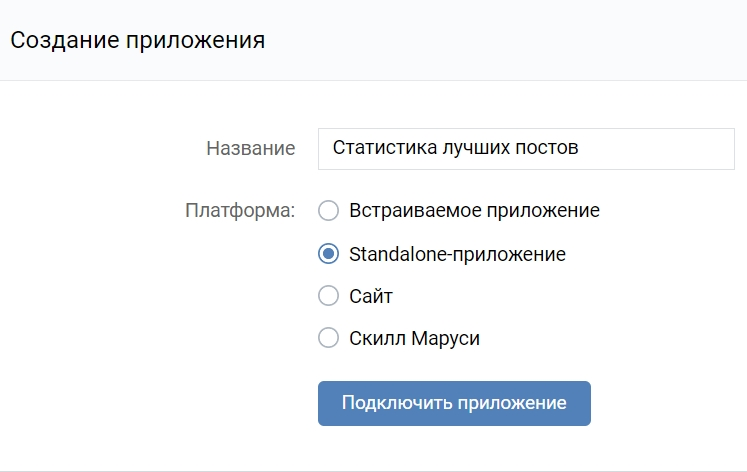

Подтвердив создание приложения на сайте в приложении ВКонтакте или по СМС, зайдите в Настройки. Нужный нам токен лежит в поле Сервисный ключ доступа:
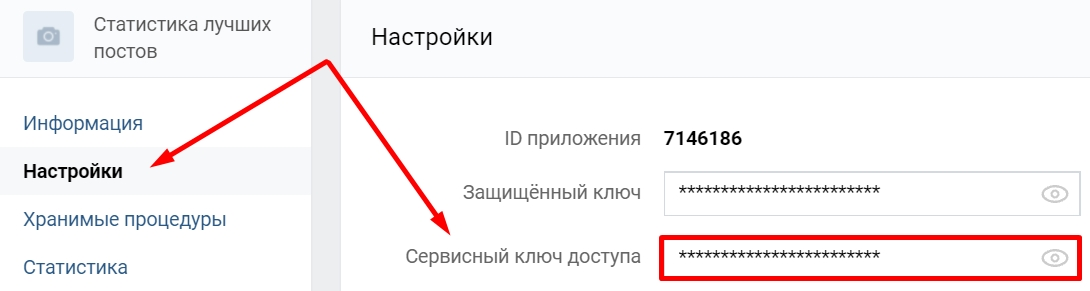

#### ПЕРВЫЕ ЗАПРОСЫ К API

Чтобы познакомиться с работой API, мы будем получать данные для статистических отчётов произвольной группы, например данные о соотношении мужчин и женщин, статистику географии пользователей и т. п.

Сначала рассмотрим работу API на простом примере, на основе которого работают многие системы.

Сделаем наш первый запрос из браузера.

Перейдите по следующей ниже ссылке в браузере, подставив вместо слова `TOKEN` ваш персональный сервисный ключ доступа (токен), полученный на предыдущем шаге:

https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=TOKEN

Примечание: адресная строка в браузере будет выглядеть примерно так:  https://api.vk.com/method/users.get?user_id=1&v=5.95&access_token=8b3341297d3341297d334129917d5e4be377d337d33412920ba951f8120284cd53ff3bd

# Мой ответ:
{"response":[{"id":1,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}

Результат:

Итак, мы сделали GET-запрос к API ВКонтакте, который состоит из следующих элементов:

* `https://api.vk.com/method` — домен и URL запроса API; обычно не меняется;
* `users.get` — название метода, который отдаёт определённый отчёт, в нашем случае это метод для получения информации о пользователе;
* `user_id` и `v` — параметры запроса: идентификатор пользователя, о котором хотим получить информацию (в нашем примере мы запрашиваем информацию о первом пользователе), и номер версии API;
* `token` — токен, который выдаётся только пользователям, имеющим право просматривать определённые данные, например показания счётчиков Яндекс.Метрики вашего проекта; на все остальные запросы без корректного токена система отвечает отказом.

Если мы обратимся к документации метода `users.get`(https://vk.com/dev/users.get), то увидим, что в ней описано множество других параметров, которые можно получить о пользователе (дата рождения, пол, родной город и другие) — словом, всё то, что мы видим на странице пользователя в интерфейсе или приложении ВКонтакте (конечно, если пользователь их указал).

Добавим к запросу дату рождения и пол (согласно документации, эти параметры надо перечислять в поле `fields`):

https://api.vk.com/method/users.get?user_id=1&v=5.95&fields=sex,bdate&access_token=TOKEN

# Мой ответ:
{"response":[{"id":1,"bdate":"10.10.1984","sex":2,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}

Примечание: значение 2 у параметра `sex` означает мужской пол.

До этого момента мы делали запросы в браузере — теперь давайте выполним запросы из кода.

#### ЗАПРОС К API ИЗ КОДА

Продолжаем пользоваться всё той же библиотекой `requests`.

In [145]:
import requests # Импортируем модуль requests
token = '4826972d4826972d4826972def4b331b9d448264826972d2cde3f2ef6769544963c0b8a' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
params = {'user_id': 1, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'} # Перечисляем параметры нашего запроса в словаре params
response = requests.get(url, params=params) # Отправляем запрос
print(response.text) # Выводим текст ответа на экран

{"response":[{"id":1,"bdate":"10.10.1984","sex":2,"first_name":"Павел","last_name":"Дуров","can_access_closed":true,"is_closed":false}]}


Мы получили строку в JSON-формате, которую можно преобразовать в словарь с помощью метода `json()`, после чего можно с лёгкостью обращаться к различным полям.

Словари нагляднее выводить с помощью функции `pprint()`, которую мы уже использовали ранее:

In [146]:
from pprint import pprint # Импортируем функцию pprint()
pprint(response.json()) # Выводим содержимое словаря, содержащего ответ, на экран

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2}]}


Как вы видите, по ключу response мы можем получить список, в котором хранятся словари, содержащие информацию о запрошенных нами пользователях. Мы запросили информацию лишь об одном из них, поэтому список содержит только один элемент. Извлечём его:

In [147]:
user = response.json()['response'][0] # Извлекаем из словаря по ключу response информацию о первом пользователе
print(user['bdate']) # Выводим дату рождения первого пользователя на экран

10.10.1984


Метод `users.get()` позволяет запрашивать информацию о множестве (до 1 000) пользователей одновременно. Для этого нужно использовать параметр `user_ids` и передавать `id` через запятую в строковом формате. Например, чтобы получить информацию о пользователях с id=1, id=2, id=3, необходимо передать значение параметра user_ids='1,2,3'.

In [148]:
ids = ",".join(map(str, range(1, 4))) # Формируем строку, содержащую информацию о поле id первых трёх пользователей
params = {'user_ids': ids, 'v': 5.95, 'fields': 'bday', 'access_token': token, 'lang': 'ru'} # Формируем строку параметров
pprint(requests.get(url, params=params).json()) # Посылаем запрос, полученный ответ в формате JSON-строки преобразуем в словарь и выводим на экран его содержимое, используя функцию pprint()

{'response': [{'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров'},
              {'can_access_closed': False,
               'first_name': 'Александра',
               'id': 2,
               'is_closed': True,
               'last_name': 'Владимирова'},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'is_closed': False,
               'last_name': ''}]}


Задание 6.2

Используя API, определите долю женщин (`sex=1`) среди пользователей с `id` `от 1 до 500`. Иногда будут попадаться пользователи, у которых пол не указан (`sex=0`), — таких пользователей не нужно учитывать в общем числе.

В ответе укажите число, `округлив до двух знаков` после точки-разделителя, например, 0.55.

*Пример: если у нас будет 300 пользователей с sex=1, 100 пользователей с sex=2 и 100 пользователей с sex=0, то в ответе должно быть 0.75.*

In [159]:
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()

token = '4826972d4826972d4826972def4b331b9d448264826972d2cde3f2ef6769544963c0b8a' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/users.get' # Указываем адрес страницы к которой делаем запрос
ids = ",".join(map(str, range(1, 500)))
params = {'user_ids': ids, 'v': 5.95, 'fields': 'sex,bdate', 'access_token': token, 'lang': 'ru'} # Перечисляем параметры нашего запроса в словаре params
response = requests.get(url, params=params)
pprint(response.json())
print(response.json()['response'])

basa = response.json()['response']
gerl = 0
other = 0
for i in basa:
    if i['sex'] == 1:
        gerl += 1
    elif i['sex'] == 0:
        continue
    else:
        other += 1
        
all = gerl + other
percentage_of_women = round(gerl/all, 2)
print(percentage_of_women)

{'response': [{'bdate': '10.10.1984',
               'can_access_closed': True,
               'first_name': 'Павел',
               'id': 1,
               'is_closed': False,
               'last_name': 'Дуров',
               'sex': 2},
              {'bdate': '14.2',
               'can_access_closed': False,
               'first_name': 'Александра',
               'id': 2,
               'is_closed': True,
               'last_name': 'Владимирова',
               'sex': 1},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 3,
               'is_closed': False,
               'last_name': '',
               'sex': 0},
              {'can_access_closed': True,
               'deactivated': 'deleted',
               'first_name': 'DELETED',
               'id': 4,
               'is_closed': False,
               'last_name': '',
               'sex': 0},
              {'bdate': '18.11',
  

#### СБОР ИНФОРМАЦИИ ИЗ ГРУПП

В одном из предыдущих юнитов в качестве примера мы собрали информацию о небольшом количестве пользователей. Теперь перейдём к более реальной задаче — сбору данных о пользователях группы ВКонтакте.

Стоит отметить, что есть много сервисов, которые выгружают похожую статистику из соцсетей. Однако им свойственны недостатки универсальных решений:

* не учитываются все особенности вашего проекта;
* используется фиксированный набор метрик, дополнительную обработку данных приходится делать вам;
* не всегда бесплатны и вряд ли позволят работать с большими объёмами данных.

Теперь мы научимся считать произвольные метрики групп, собирая данные из API и работая с двумя ограничениями, которые свойственны практически всем системам:

* ограничение на количество вызовов в единицу времени;
* ограничение на количество выгружаемых строк за один запрос.

Давайте рассмотрим, как работать с этими ограничениями на примере выгрузки списка пользователей группы https://vk.com/vk социальной сети ВКонтакте.

Обратимся к документации, чтобы узнать, какие методы нам доступны для групп, — для получения списка пользователей группы доступен метод `groups.getMembers`.

Согласно документации, обязательным параметром данного метода является `group_id` — идентификатор, или короткое имя, группы. В нашем случае это `vk`: https://vk.com/vk. Протестируем, как работает метод в самом простом случае, — получим `id` участников группы:

In [160]:
import requests # Импортируем модуль requests
token = '4826972d4826972d4826972def4b331b9d448264826972d2cde3f2ef6769544963c0b8a' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/groups.getMembers' # Указываем адрес обращения
params = {'group_id': 'vk', 'v': 5.95, 'access_token': token} # Формируем строку параметров
response = requests.get(url, params = params) # Посылаем запрос
data = response.json() # Ответ сохраняем в переменной data в формате словаря
print(data) # Выводим содержимое переменной data на экран (отображён фрагмент)

{'response': {'count': 13340210, 'items': [6, 19, 47, 54, 79, 177, 198, 212, 219, 239, 243, 345, 407, 421, 450, 467, 485, 510, 550, 619, 640, 690, 702, 721, 804, 809, 831, 832, 834, 847, 900, 905, 907, 914, 930, 943, 952, 958, 966, 976, 979, 997, 1000, 1018, 1023, 1032, 1033, 1038, 1039, 1059, 1097, 1131, 1139, 1140, 1159, 1174, 1185, 1188, 1301, 1333, 1334, 1336, 1351, 1381, 1386, 1388, 1406, 1411, 1418, 1432, 1494, 1503, 1531, 1550, 1568, 1586, 1590, 1593, 1598, 1610, 1615, 1632, 1634, 1650, 1679, 1690, 1697, 1698, 1699, 1700, 1721, 1740, 1754, 1796, 1814, 1820, 1829, 1834, 1839, 1840, 1843, 1858, 1863, 1869, 1887, 1889, 1917, 1943, 1947, 1955, 1969, 2019, 2028, 2050, 2051, 2052, 2059, 2077, 2103, 2136, 2150, 2195, 2201, 2230, 2236, 2273, 2281, 2296, 2298, 2376, 2389, 2395, 2403, 2412, 2436, 2456, 2466, 2470, 2484, 2512, 2513, 2515, 2539, 2571, 2576, 2592, 2601, 2622, 2644, 2654, 2692, 2706, 2745, 2755, 2767, 2787, 2797, 2827, 2858, 2909, 2919, 2922, 2953, 2962, 2982, 3001, 3006, 304

По ключу count мы можем получить общее число участников группы, а список по ключу `items` хранит их `id`. Посмотрим на него поближе:

In [161]:
print(len(data['response']['items'])) # Выводим на экран количество элементов словаря

1000


Мы видим, что всего пользователей в группе больше 11 миллионов, а получили мы только первую тысячу пользователей группы. По информации, указанной в документации о параметре count, это максимум, который может отдать API за один раз.

Для получения следующей тысячи пользователей можно воспользоваться параметром `offset` (с англ. смещение), который передвинет начало отсчёта. Для выгрузки всех пользователей группы будем в цикле выгружать по 1000 пользователей (`count` будет всегда равен 1000), увеличивая смещение `offset` на величину `count`.

Для тренировки напишем цикл выгрузки первых 20 пользователей со значением `count=5`. Иными словами, мы будем выгружать по пять пользователей за запрос до тех пор, пока не получим информацию о 20 пользователях.

Давайте выведем на экран первые 20 пользователей из нашей первой попытки получить информацию о 1000 пользователей, чтобы мы могли сверить результат выгрузки из 20 пользователей:

In [162]:
# Загружаем в переменную информацию об 
# id первых 20 пользователей в виде списка
users_for_checking = data['response']['items'][:20] 
print(users_for_checking) # Выводим перечень id 
# первых 20 пользователей

[6, 19, 47, 54, 79, 177, 198, 212, 219, 239, 243, 345, 407, 421, 450, 467, 485, 510, 550, 619]


Теперь используем `count` и `offset`, чтобы получить те же `id` по пять за раз:

In [163]:
import requests # Импортируем модуль requests
token = '4826972d4826972d4826972def4b331b9d448264826972d2cde3f2ef6769544963c0b8a' # Указываем свой сервисный токен
# Указываем адрес обращения
url = 'https://api.vk.com/method/groups.getMembers' 
count = 5 
offset = 0 
user_ids = [] 
max_count = 20 
while offset < max_count: 
    # Будем выгружать по count=5 пользователей, 
    # начиная с того места,
    # где закончили на предыдущей итерации (offset) 
    print('Выгружаю {} пользователей с offset = {}'.format(
        count, offset))   
    params = {'group_id': 'vk', 'v': 5.95,
              'count': count, 'offset': offset,
              'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    # Увеличиваем смещение на количество строк,
    # которое мы уже выгрузили 
    offset += count 
print(user_ids) 

Выгружаю 5 пользователей с offset = 0
Выгружаю 5 пользователей с offset = 5
Выгружаю 5 пользователей с offset = 10
Выгружаю 5 пользователей с offset = 15
[6, 19, 47, 54, 79, 177, 198, 212, 219, 239, 243, 345, 407, 421, 450, 467, 485, 510, 550, 619]


Сравним списки, полученные двумя способами:

In [164]:
print(user_ids == users_for_checking)

True


Так как результат сравнения — `True`, списки идентичны. Значит, второй способ работает корректно. Теперь мы можем получить данные обо всех пользователях, выставив `count = 1000` и `max_count = data`['`response`']['`count`'].

#### ОГРАНИЧЕНИЕ ПО ЧАСТОТЕ ЗАПРОСОВ

→ В `API` часто добавляют ограничение по частоте запросов, чтобы отдельно взятые пользователи слишком сильно не перегружали сервер. Подобное ограничение есть и у ВКонтакте — в документации указано, что можно делать не более трёх запросов в секунду.

Чтобы не следить за частотой отправки запросов с секундомером в руках, мы можем после каждого запроса делать паузу. В этом случае, даже если код будет выполняться на самом быстром компьютере, мы не нарушим установленное ограничение, так как периодичность отправки запросов будет искусственно замедлена.

Воспользуемся библиотекой `time` и методом `sleep`, с помощью которого мы можем добавить паузу, например в 0.5 секунд, после каждого запроса:

In [165]:
import requests # Импортируем модуль requests
import time # Импортируем модуль time
token = '4826972d4826972d4826972def4b331b9d448264826972d2cde3f2ef6769544963c0b8a' # Указываем свой сервисный токен
# Указываем адрес страницы, к которой делаем запрос
url = 'https://api.vk.com/method/groups.getMembers' 
count = 1000 
offset = 0  
user_ids = []  
while offset < 5000: 
    params = {'group_id': 'vk', 'v': 5.95,
              'count': count, 'offset': offset, 'access_token': token} 
    response = requests.get(url, params = params) 
    data = response.json() 
    user_ids += data['response']['items'] 
    offset += count 
    print('Ожидаю 0.5 секунды...') 
    time.sleep(0.5) 
print('Цикл завершен, offset =',offset) 

Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Ожидаю 0.5 секунды...
Цикл завершен, offset = 5000


#### ЛАЙКИ, РЕПОСТЫ И КОММЕНТАРИИ

Через API новостной ленты ВКонтакте мы можем получить информацию о взаимодействии с сообщениями в ленте.

Для примера продолжим работать с группой https://vk.com/vk и рассмотрим последние 1000 сообщений в новостной ленте.

Для получения информации о сообщениях на стене в API ВКонтакте предусмотрен метод `wall.get`. Применим его:

In [166]:
import requests # Импортируем модуль requests
from pprint import pprint # Импортируем функцию pprint()
token = '4826972d4826972d4826972def4b331b9d448264826972d2cde3f2ef6769544963c0b8a' # Указываем свой сервисный токен
url = 'https://api.vk.com/method/wall.get' # Указываем адрес страницы, к которой делаем запрос
params = {'domain': 'vk', 'filter': 'owner', 'count': 1000, 'offset': 0, 'access_token': token, 'v': 5.95} 
response = requests.get(url, params = params) 
pprint(response.json()) 

{'response': {'count': 627,
              'items': [{'attachments': [{'photo': {'access_key': 'c10480767ef0135749',
                                                    'album_id': -7,
                                                    'date': 1693924505,
                                                    'id': 457343722,
                                                    'owner_id': -22822305,
                                                    'sizes': [{'height': 75,
                                                               'type': 's',
                                                               'url': 'https://sun3-21.userapi.com/impg/jHFfxdHx0kxs0e4j8pYgXjWghR_B6GkEpMo7vg/QGC4WOTVW6s.jpg?size=75x75&quality=95&sign=bac9d4fec210593fa41fd6f133875230&c_uniq_tag=QqpT8pIpfR1vlMOPW2bXRN4M64n5zhU4_dvj2czqQgY&type=album',
                                                               'width': 75},
                                                              {'height': 130,
     

Анализируя ответ, понимаем, что по ключу `count` можно найти общее количество сообщений в новостной ленте, а по ключу `items` — сами сообщения.